# ------------KNN KULLANIM ALANLARI------------
#### Müşterinin verilen krediyi ödeyip ödeyemeyeceği (Customer Default Risk)
#### Müşterinin aldığı servisi bırakıp bırakmayacağı (Customer Churn)
#### Müşteri segmantasyon (Customer Segmantation)
#### Kişiye özel ilaç tespiti
#### E-posta spam filitrelemesi
#### Görüntü tanıma (Image Recognition)
#### El yazısı tanıma (Handwriting Recognition)
#### Biyometrik tanımlama (Biometric Identification)

In [30]:
#Kütüphanelerin kurlumu
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [31]:
#
class CustomKNN:
    def __init__(self, k=3):
#None olarak atanmasının sebebi fit metodu çağrılmadan önce bu değerlerin atanmamış olması durumunu kontrol etmek içindir.
        self.k = k  # K değerini sınıfa atama, varsayılan olarak 3
        self.X_train = None  # Eğitim veri seti için özellikleri depolamak için değişken
        self.y_train = None  # Eğitim veri seti için etiketleri depolamak için değişken

    def fit(self, X, y):
        self.X_train = X  # Eğitim veri setini sınıfa atama
        self.y_train = y  # Eğitim veri setinin etiketlerini sınıfa atama

    #iki nokta arasındaki doğrudan mesafeyi ölçelim
    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))  # İki vektör arasındaki Euclidean mesafesini hesaplama

    
    def predict(self, X):
        predictions = []  # Tahminlerin depolanacağı liste
        for sample in X:  # Her bir test örneği için
            # Eğitim veri setindeki her bir örnek ile test örneği arasındaki mesafeleri hesaplama
            distances = [self.euclidean_distance(sample, x_train) for x_train in self.X_train]
            # Mesafeleri küçükten büyüğe sıralama ve en yakın k komşunun indislerini almak
            k_indices = np.argsort(distances)[:self.k]
            # En yakın komşuların etiketlerini alma
            k_nearest_labels = [self.y_train[i] for i in k_indices]
            # En çok olan sınıfı tahmin olarak seçme
            most_common = Counter(k_nearest_labels).most_common(1)
            predictions.append(most_common[0][0])  # Tahminleri listeye ekleme
        return predictions  # Tüm tahminleri döndürme


In [43]:
# Iris veri setini yükleme
iris = load_iris()
X = iris.data
y = iris.target

target_names = iris.target_names  # Tür isimlerini aldık
data_names   = iris.feature_names

# Veriyi Pandas DataFrame'e dönüştürme
X_df = pd.DataFrame(X, columns=iris.feature_names)
y_df = pd.DataFrame(y, columns=["species"])  # Hedef değişkenin adını "species" olarak belirledik

# Tüm tür isimlerini gösterme
print(target_names)
print(data_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [44]:
# İlk birkaç satırı gösterme
print(X_df.head())
print(y_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
   species
0        0
1        0
2        0
3        0
4        0


In [45]:
# Temel istatistikleri gösterme
print(X_df.describe())
print(y_df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  
          species
count  150.000000
mean     1.000000
std      0.819232
min      0.000000
25%      0.000000
50%      1.000000
75%      2.000000
max      2.000000


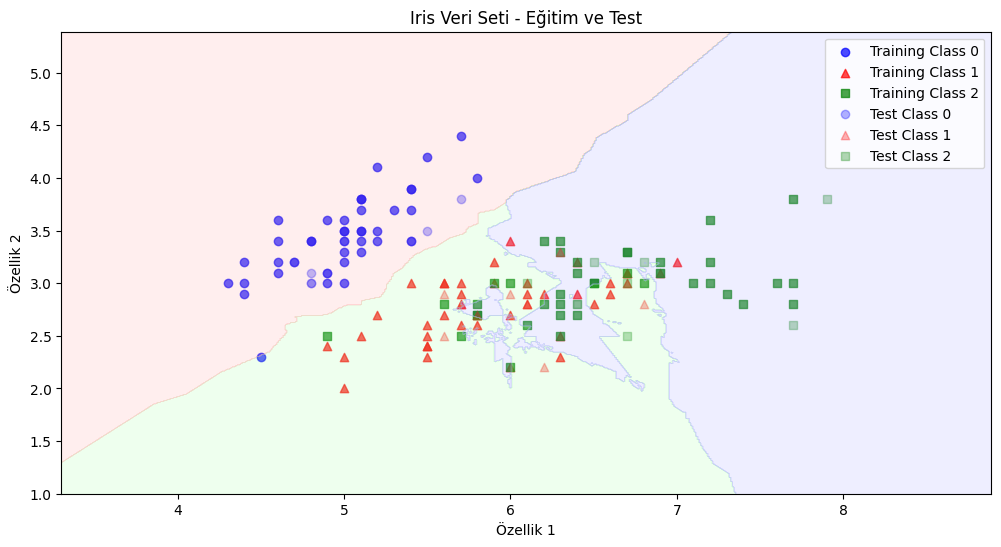

In [23]:

# Veri setini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veri görselleştirme için sadece ilk iki özelliği kullanalım
plt.figure(figsize=(12, 6))

# Eğitim veri setini görselleştirme
for i, color, marker in zip(range(3), ('blue', 'red', 'green'), ('o', '^', 's')):
    plt.scatter(X_train[y_train == i][:, 0], X_train[y_train == i][:, 1], color=color, label=f'Training Class {i}', marker=marker, alpha=0.7)

# Test veri setini görselleştirme
for i, color, marker in zip(range(3), ('blue', 'red', 'green'), ('o', '^', 's')):
    plt.scatter(X_test[y_test == i][:, 0], X_test[y_test == i][:, 1], color=color, label=f'Test Class {i}', marker=marker, alpha=0.3)

# Grafik ayarları
plt.title('Iris Veri Seti - Eğitim ve Test')
plt.xlabel('Özellik 1')
plt.ylabel('Özellik 2')
plt.legend()  # Eğer legend için etiketler tanımlansaydı, sınıf etiketlerini gösterirdi

# KNN modelinin oluşturulması ve eğitilmesi
knn = CustomKNN(k=5)  # KNN modeli oluşturuluyor, k=5 olarak belirleniyor
knn.fit(X_train[:, :2], y_train)  # Sadece ilk iki özelliği kullanarak model eğitiliyor

# Karar sınırlarının çizilmesi için ızgara oluşturulması
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1  # X ekseninin sınırları belirleniyor
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1  # Y ekseninin sınırları belirleniyor
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))  # 0.01 aralıklarla ızgara oluşturuluyor

# Her bir ızgara noktasının sınıfının tahmin edilmesi
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])  # Tüm ızgara noktalarının sınıflarını tahmin ediyoruz
Z = np.array(Z).reshape(xx.shape)  # Tahminler ızgara şekline dönüştürülüyor

# Karar sınırlarının görselleştirilmesi
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])  # Renk haritası belirleniyor
plt.contourf(xx, yy, Z, alpha=0.2, cmap=cmap_light)  # Karar sınırları görselleştiriliyor

# Oluşturulan grafiklerin gösterilmesi
plt.show()
